#### Bootcamp DS Katowice IV

#### Wojciech Wodarski

---------------------

## Wybrany projekt: Temat 2 - Przewidywanie udzielenia pożyczki

------------

Celem projektu jest zastosowanie modeli klasyfikacji (binarnej) do przewidzenia czy pożyczka zostanie udzielona danemu klientowi z danymi parametrami wniosku.

Link do danych:

In [1]:
data_url = r'https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/master/dataSet/Train.csv'

## Wymogi:
* Zmienna LoggedIn nie może być uwzględniona w modelowaniu - należy ją od razu wyrzucić zezbioru
* Nie usuwamy żadnych obserwacji - braki danych uzupełniamy w jakiś sposób.
* Wszelkie nieoczywiste przekształcenia danych należy opatrzyć uzasadnieniem dlaczego dokonujemy tego przekształcenia (np. robimy wykres i uzasadniamy wzięci logarytmu ze zmiennej tym, że rozkład jest skośny).
* Należy wykorzystać przynajmniej 3 metody klasyfikacji.
* Należy uwzględnić optymalizację modeli/pipelinów.
* Projekt musi być zakończony przejrzystym porównaniem przetestowanych rozwiązań (modeli/pipelinów) w postaci tabeli , gdzie jeden wiersz opisuje jedno rozwiązanie i jego wynik.

Opis danych (najdokładniejszy jaki istnieje):

https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802

## opis danych spod linku:
    
Input variables:
* ID - Unique ID (can not be used for predictions)
* Gender- Sex
* City - Current City
* Monthly_Income - Monthly Income in rupees
* DOB - Date of Birth
* Lead_Creation_Date - Lead Created on date
* Loan_Amount_Applied - Loan Amount Requested (INR)
* Loan_Tenure_Applied - Loan Tenure Requested (in years)
* Existing_EMI - EMI of Existing Loans (INR)
* Employer_Name - Employer Name
* Salary_Account- Salary account with Bank
* Mobile_Verified - Mobile Verified (Y/N)
* Var5- Continuous classified variable
* Var1- Categorical variable with multiple levels
* Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
* Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
* Interest_Rate- Interest Rate of Submitted Loan Amount
* Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
* EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
* Filled_Form- Filled Application form post quote
* Device_Type- Device from which application was made (Browser/ Mobile)
* Var2- Categorical Variable with multiple Levels
* Source- Categorical Variable with multiple Levels
* Var4- Categorical Variable with multiple Levels

Outcomes:
* LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
* Disbursed- Loan Disbursed (Target Variable)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime

from sklearn import model_selection
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


## import danych

In [3]:
data = pd.read_csv(data_url, sep=",", encoding = "ISO-8859-1") 

## wstępny przegląd danych

In [4]:
data.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     87020 non-null  object 
 1   Gender                 87020 non-null  object 
 2   City                   86017 non-null  object 
 3   Monthly_Income         87020 non-null  int64  
 4   DOB                    87020 non-null  object 
 5   Lead_Creation_Date     87020 non-null  object 
 6   Loan_Amount_Applied    86949 non-null  float64
 7   Loan_Tenure_Applied    86949 non-null  float64
 8   Existing_EMI           86949 non-null  float64
 9   Employer_Name          86949 non-null  object 
 10  Salary_Account         75256 non-null  object 
 11  Mobile_Verified        87020 non-null  object 
 12  Var5                   87020 non-null  int64  
 13  Var1                   87020 non-null  object 
 14  Loan_Amount_Submitted  52407 non-null  float64
 15  Lo

#### braki w danych

In [6]:
data.isna().sum()

ID                           0
Gender                       0
City                      1003
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name               71
Salary_Account           11764
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
LoggedIn                     0
Disbursed                    0
dtype: int64

#### Czy klasy zbalansowane?

In [7]:
data["Disbursed"].unique()

array([0, 1], dtype=int64)

In [8]:
data["Disbursed"].value_counts()

0    85747
1     1273
Name: Disbursed, dtype: int64

#### Na 87020 wniosków, udzielono 1273 pożyczek. 
#### Klasy niezbalansowane


* ID - Usuwamy zgodnie z opisem.               
* Gender - zm. kategoryczna.                   
* City - zm. kategoryczna. Nie będzie brana pod uwagę do klasyfikacji.                
* Monthly_Income - zm. num. Zostaje zamieniona zmienną Monthly_Income_log.  
* DOB - zm. num. Do usunięcia - razem ze zmienna Lead_Creation_Date zostaje zamieniona na zmienną numeryczną Age_on_Lead_Creation_Date.              
* Lead_Creation_Date - zm. num. Do usunięcia - razem ze zmienna Lead_Creation_Date zostaje zamieniona na zmienną numeryczną Age_on_Lead_Creation_Date.
* Loan_Amount_Applied - zm. num. Zostaje zamieniona zmienną Loan_Amount_Applied_log.     
* Loan_Tenure_Applied - zm. numeryczna.
* Existing_EMI - zm. num. Zostaje zamieniona zmienną Existing_EMI_log.           
* Employer_Name - zm. kategoryczna. Nie będzie brana pod uwagę do klasyfikacji.            
* Salary_Account - zm. kategoryczna. Nie będzie brana pod uwagę do klasyfikacji.             
* Mobile_Verified - zm. kategoryczna.          
* Var5 - zm. numeryczna. . Zmiana na zmienną kategotyczną.                     
* Var1 - zm. kategoryczna. Z niej tworzymy również dodatkowe zmienne: "Var1_l1","Var1_l2","Var1_l3".               
* Loan_Amount_Submitted - zm. numeryczna. Dużo braków.       
* Loan_Tenure_Submitted - zm. numeryczna. Dużo braków.      
* Interest_Rate - zm. numeryczna. Dużo braków.             
* Processing_Fee - zm. numeryczna. Dużo braków.            
* EMI_Loan_Submitted - zm. numeryczna. Dużo braków.        
* Filled_Form - zm. kategoryczna.               
* Device_Type - zm. kategoryczna.               
* Var2 - zm. kategoryczna.                
* Source - zm. kategoryczna.                 
* Var4 - zm. numeryczna. Zmiana na zmienną kategotyczną.                     
* LoggedIn - do usunięcia. OK                 
* Disbursed - y, do usunięcia z X. OK         


Dla zmiennych kategorycznych usuwamy na końcu wartości rzadkie (<1000)

## Analiza i obróbka danych

#### ZMIENNE DO USUNIĘCIA:
* ID - Unique ID (can not be used for predictions)
* LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
* Disbursed - zmienna docelowa - jako y (nie powinno być w X)

In [9]:
y = data['Disbursed']

In [10]:
y

0        0
1        0
2        0
3        0
4        0
        ..
87015    0
87016    0
87017    0
87018    0
87019    0
Name: Disbursed, Length: 87020, dtype: int64

In [11]:
# Usuwamy zmienne ID, LoggedIn
data = data.drop(['ID','LoggedIn'], axis=1)

In [12]:
data.head()

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
0,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,...,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0
1,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,...,2.0,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0
2,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,...,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0
3,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,...,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0
4,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,...,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,0


#### ZMIENNE NUMERYCZNE:
* Monthly_Income - Monthly Income in rupees
* DOB - Date of Birth
* Lead_Creation_Data - Lead Created on date
* Loan_Amount_Applied - Loan Amount Requested (INR)
* Loan_Tenure_Applied - Loan Tenure Requested (in years)
* Existing_EMI - EMI of Existing Loans (INR)


* Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
* Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
* Interest_Rate- Interest Rate of Submitted Loan Amount
* Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
* EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)

#### ZMIENNE KATEGORYCZNE:

* Gender- Sex 
* City - Current City
* Employer_Name - Employer Name
* Salary_Account- Salary account with Bank
* Mobile_Verified - Mobile Verified (Y/N)
* Filled_Form- Filled Application form post quote
* Device_Type- Device from which application was made (Browser/ Mobile)
* Source- Categorical Variable with multiple Levels
* Var1- Categorical variable with multiple levels
* Var2- Categorical Variable with multiple Levels
* Var4 - Categorical Variable with multiple Levels (num)
* Var5 - Continuous classified variable (W MOIM ODCZUCIU KATEGORYCZNA)

In [13]:
data.nunique()

Gender                       2
City                       697
Monthly_Income            5825
DOB                      11345
Lead_Creation_Date          92
Loan_Amount_Applied        277
Loan_Tenure_Applied         11
Existing_EMI              3753
Employer_Name            43567
Salary_Account              57
Mobile_Verified              2
Var5                        19
Var1                        19
Loan_Amount_Submitted      203
Loan_Tenure_Submitted        6
Interest_Rate               73
Processing_Fee             571
EMI_Loan_Submitted        4530
Filled_Form                  2
Device_Type                  2
Var2                         7
Source                      30
Var4                         8
Disbursed                    2
dtype: int64

#### wśród zmiennych kategorycznych, ze względu na dużą liczbę wartości unikalnych (ale też i moją wiedzę z zakresu bankowości), uwagę zwracają: Employer_Name, City. Prawdopodobnie zostaną pominięte jako niestotne w badaniu modelu. Do sprawdzenia są także Salary_account

 #### uwagę również zwracają zmienne: Var1, Var2, Var4, Var5. Niewiele o nich wiadomo, a opis jest oszczędny.

In [14]:
data['Gender']

0        Female
1          Male
2          Male
3          Male
4          Male
          ...  
87015    Female
87016    Female
87017      Male
87018      Male
87019      Male
Name: Gender, Length: 87020, dtype: object

#### zmienna Gender nie wymaga zmian. Podobnie zmienne: Mobile_Verified, Filled_Form, Device_Type

In [15]:
data["City"].value_counts()

Delhi         12527
Bengaluru     10824
Mumbai        10795
Hyderabad      7272
Chennai        6916
              ...  
Gopal Ganj        1
Fazilka           1
CHOTILA           1
Seoni             1
Nabha             1
Name: City, Length: 697, dtype: int64

In [16]:
data[data["Disbursed"] == 1]["City"].value_counts()

Delhi        269
Bengaluru    179
Mumbai       169
Pune         121
Hyderabad     84
            ... 
Sonipat        1
Howrah         1
Kanpur         1
Moga           1
Kolhapur       1
Name: City, Length: 104, dtype: int64

#### zm. City ma prawie 700 unikalnych wartosci, a dla udzielonych pożych ponad 100 - z dużym prawdopodobieństwem nie jest istotna z punktu widzenia udzielenia pożyczki

In [17]:
data["Employer_Name"].value_counts()

0                                                4914
TATA CONSULTANCY SERVICES LTD (TCS)               550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD      404
ACCENTURE SERVICES PVT LTD                        324
GOOGLE                                            301
                                                 ... 
NEWBY TEAS OVERSEAS P LTD                           1
APOTEX RESEARCH PVT. LTD                            1
SARANGA CONSULTANCY & ELECTRICAL SERVICES LLP       1
FOR SHOP                                            1
SHARAD DADAJI MORE                                  1
Name: Employer_Name, Length: 43567, dtype: int64

In [18]:
data[data["Disbursed"] == 1]["Employer_Name"].value_counts()

TATA CONSULTANCY SERVICES LTD (TCS)             21
ACCENTURE SERVICES PVT LTD                      12
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD    10
INDIAN RAILWAY                                   7
GENPACT                                          7
                                                ..
SUNSTAR OVERSEAS LIMITED                         1
WNS GLOBAL SERVICES PVT LTD                      1
NAIR HOSPITAL                                    1
GENPACT                                          1
JSPM COLLEGE OF ENGG                             1
Name: Employer_Name, Length: 1046, dtype: int64

#### rozproszenie przy zm. Employer_Name wskazuje, że nie jest istotna z punktu widzenia udzielonej pożyczki

In [19]:
data["Salary_Account"].value_counts()

HDFC Bank                                          17695
ICICI Bank                                         13636
State Bank of India                                11843
Axis Bank                                           8783
Citibank                                            2376
Kotak Bank                                          2067
IDBI Bank                                           1550
Punjab National Bank                                1201
Bank of India                                       1170
Bank of Baroda                                      1126
Standard Chartered Bank                              995
Canara Bank                                          990
Union Bank of India                                  951
Yes Bank                                             779
ING Vysya                                            678
Corporation bank                                     649
Indian Overseas Bank                                 612
State Bank of Hyderabad        

In [20]:
data[data["Disbursed"] == 1]["Salary_Account"].value_counts()

HDFC Bank                         373
ICICI Bank                        307
Axis Bank                         147
State Bank of India               112
Citibank                           67
Kotak Bank                         38
Standard Chartered Bank            27
IDBI Bank                          16
Punjab National Bank               16
HSBC                               13
Indian Bank                        10
Corporation bank                   10
Yes Bank                           10
Canara Bank                         7
Central Bank of India               7
Bank of Baroda                      7
Oriental Bank of Commerce           7
ING Vysya                           6
Bank of India                       5
State Bank of Hyderabad             5
Indian Overseas Bank                5
Deutsche Bank                       5
State Bank of Patiala               5
UCO Bank                            4
Union Bank of India                 4
The Ratnakar Bank Ltd               3
Vijaya Bank 

#### podobnie jak w przypadku poprzednich zmiennych, zm. Salary_Account nie jest istotna z punktu widzenia udzielonej pożyczki

In [21]:
data["Source"].value_counts()

S122    38567
S133    29885
S159     5599
S143     4332
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      650
S153      494
S156      308
S144      299
S158      208
S123       73
S141       57
S162       36
S124       24
S160       11
S150       10
S155        4
S139        3
S129        3
S136        3
S138        3
S135        2
S154        1
S130        1
S125        1
S140        1
Name: Source, dtype: int64

#### zakłądam, że to jest źródło wniosku, Trudno określić jej istotność na tej podstawie - pozostaje.

In [22]:
data.head()

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
0,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,...,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0
1,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,...,2.0,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0
2,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,...,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0
3,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,...,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0
4,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,...,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,0


#### zmienne: Var1, Var2, Var4, Var5.

In [23]:
data["Var1"].value_counts()

HBXX    59294
HBXC     9010
HBXB     4479
HAXA     2909
HBXA     2123
HAXB     2011
HBXD     1964
HAXC     1536
HBXH      970
HCXF      722
HAYT      508
HAVC      384
HAXM      268
HCXD      237
HCYS      217
HVYS      186
HAZD      109
HCXG       78
HAXF       15
Name: Var1, dtype: int64

#### O zmiennej niewiele wiadomo. W ciągu znaków widoczny jest wzór. Możliwe, że poza pierwszym znakiem pozostałe mają jakieś znaczenie z punktu widzenia banku (np. opis ryzyka?). rozbiję ten ciąg znaków na 3 zmienne (2, 3, 4 znak). Prawdopodobnie później zmienna Var1 nie będzie potrzebna

In [24]:
data["Var1_2"] = data["Var1"].str[1]
data["Var1_3"] = data["Var1"].str[2]
data["Var1_4"] = data["Var1"].str[3]

In [25]:
data[["Var1","Var1_2","Var1_3","Var1_4"]].value_counts()

Var1  Var1_2  Var1_3  Var1_4
HBXX  B       X       X         59294
HBXC  B       X       C          9010
HBXB  B       X       B          4479
HAXA  A       X       A          2909
HBXA  B       X       A          2123
HAXB  A       X       B          2011
HBXD  B       X       D          1964
HAXC  A       X       C          1536
HBXH  B       X       H           970
HCXF  C       X       F           722
HAYT  A       Y       T           508
HAVC  A       V       C           384
HAXM  A       X       M           268
HCXD  C       X       D           237
HCYS  C       Y       S           217
HVYS  V       Y       S           186
HAZD  A       Z       D           109
HCXG  C       X       G            78
HAXF  A       X       F            15
dtype: int64

#### Var2 - zm. kategoryczna. zostawiam w takiej postaci

In [26]:
data["Var4"].value_counts()

3    25260
1    23906
5    20266
4     6577
2     5931
0     2546
7     2302
6      232
Name: Var4, dtype: int64

#### Var4 - zm. kategoryczna, mimo, że występuje jako liczba

In [27]:
data["Var5"].value_counts()

0     29087
1     12236
3      6759
11     5204
2      4485
14     3662
15     3509
12     2989
13     2622
8      2515
10     2427
9      2281
16     2097
4      1815
17     1691
7      1489
6       983
5       975
18      194
Name: Var5, dtype: int64

#### Var5 - zm. kategoryczna, mimo, że występuje jako ciągła

In [28]:
categorical=['Gender',
          'Mobile_Verified',
          'Filled_Form',
          'Device_Type',
          'Var2',
          'Source',
          'Var4',
          'Var5'
         ]

In [29]:
categorical = categorical + ['Var1_2','Var1_3','Var1_4']

In [30]:
categorical

['Gender',
 'Mobile_Verified',
 'Filled_Form',
 'Device_Type',
 'Var2',
 'Source',
 'Var4',
 'Var5',
 'Var1_2',
 'Var1_3',
 'Var1_4']

In [31]:
data.head()

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Var1_2,Var1_3,Var1_4
0,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,...,NaN,N,Web-browser,G,S122,1,0,B,X,X
1,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,...,6762.9,N,Web-browser,G,S122,3,0,B,X,A
2,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,...,NaN,N,Web-browser,B,S143,1,0,B,X,X
3,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,...,NaN,N,Web-browser,B,S143,3,0,B,X,X
4,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,...,NaN,N,Web-browser,B,S134,3,0,B,X,X


In [32]:
from warnings import filterwarnings
filterwarnings("ignore")

#### Transformator 'ReduceRareValues' posłuży do zredukowania wartości zmiennych nominalnych - zastępuje wartości występujących w mniej niż 'treshold' obserwacji wartością 'replace_value', domyślnie równą 'rare_value'
#### Zastosujemy go do usunięcia rzadkich wartości dla wartości kolumn z grupy 'categorical'

In [33]:
class ReduceRareValues(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 threshold, 
                 replace_value='rare_value'):
        self.threshold = threshold
        self.replace_value = replace_value
        
        # kontener przechowujący mapowanie kolumna -> lista_częstych_wartości_w_kolumnie
        self.classes_to_keep = {}
        
    def fit(self, X, y=None):
        
        # dla każdej kolumny:
        for column in X.columns:
            
            # sprawdź, które wartości są częstsze niż zadany threshold
            frequent_values = X[column].value_counts() > self.threshold
            
            # pozyskaj listę indeksów (wartości), które występują często w danej zmiennej
            values_to_keep = frequent_values[frequent_values == True].index.tolist()
            
            # dopisz do słownika wartości, które zachowasz dla danej kolumny
            self.classes_to_keep[column] = values_to_keep
        return self
    
    def transform(self, X):
        X_copied = X.copy()
        
        # dla każdego itema (kolumna + częste wartości) w słowniku:
        for column, frequent_values in self.classes_to_keep.items():
            
            # wybierz unikalne wartości z wybranej kolumny, które nie są None'ami
            unique_values = X[column][X[column].notnull()].unique()
            
            # wybierz wartości, które znajdują się w unique_values, a których nie ma w frequent_values
            values_to_replace = np.setdiff1d(unique_values, frequent_values)
            
            # jeśli są jakieś wartości do zastąpienia, zastąp wybranym szblonem
            if values_to_replace.size > 0:
                X_copied[column].replace(values_to_replace, self.replace_value, inplace=True)
                
        return X_copied

In [34]:
# usuwamy wartości rzadkie, po kilku testach - treshold na 1000
rrv = ReduceRareValues(threshold=1000)
rrv.fit(data[categorical])
data[categorical] = rrv.transform(data[categorical])

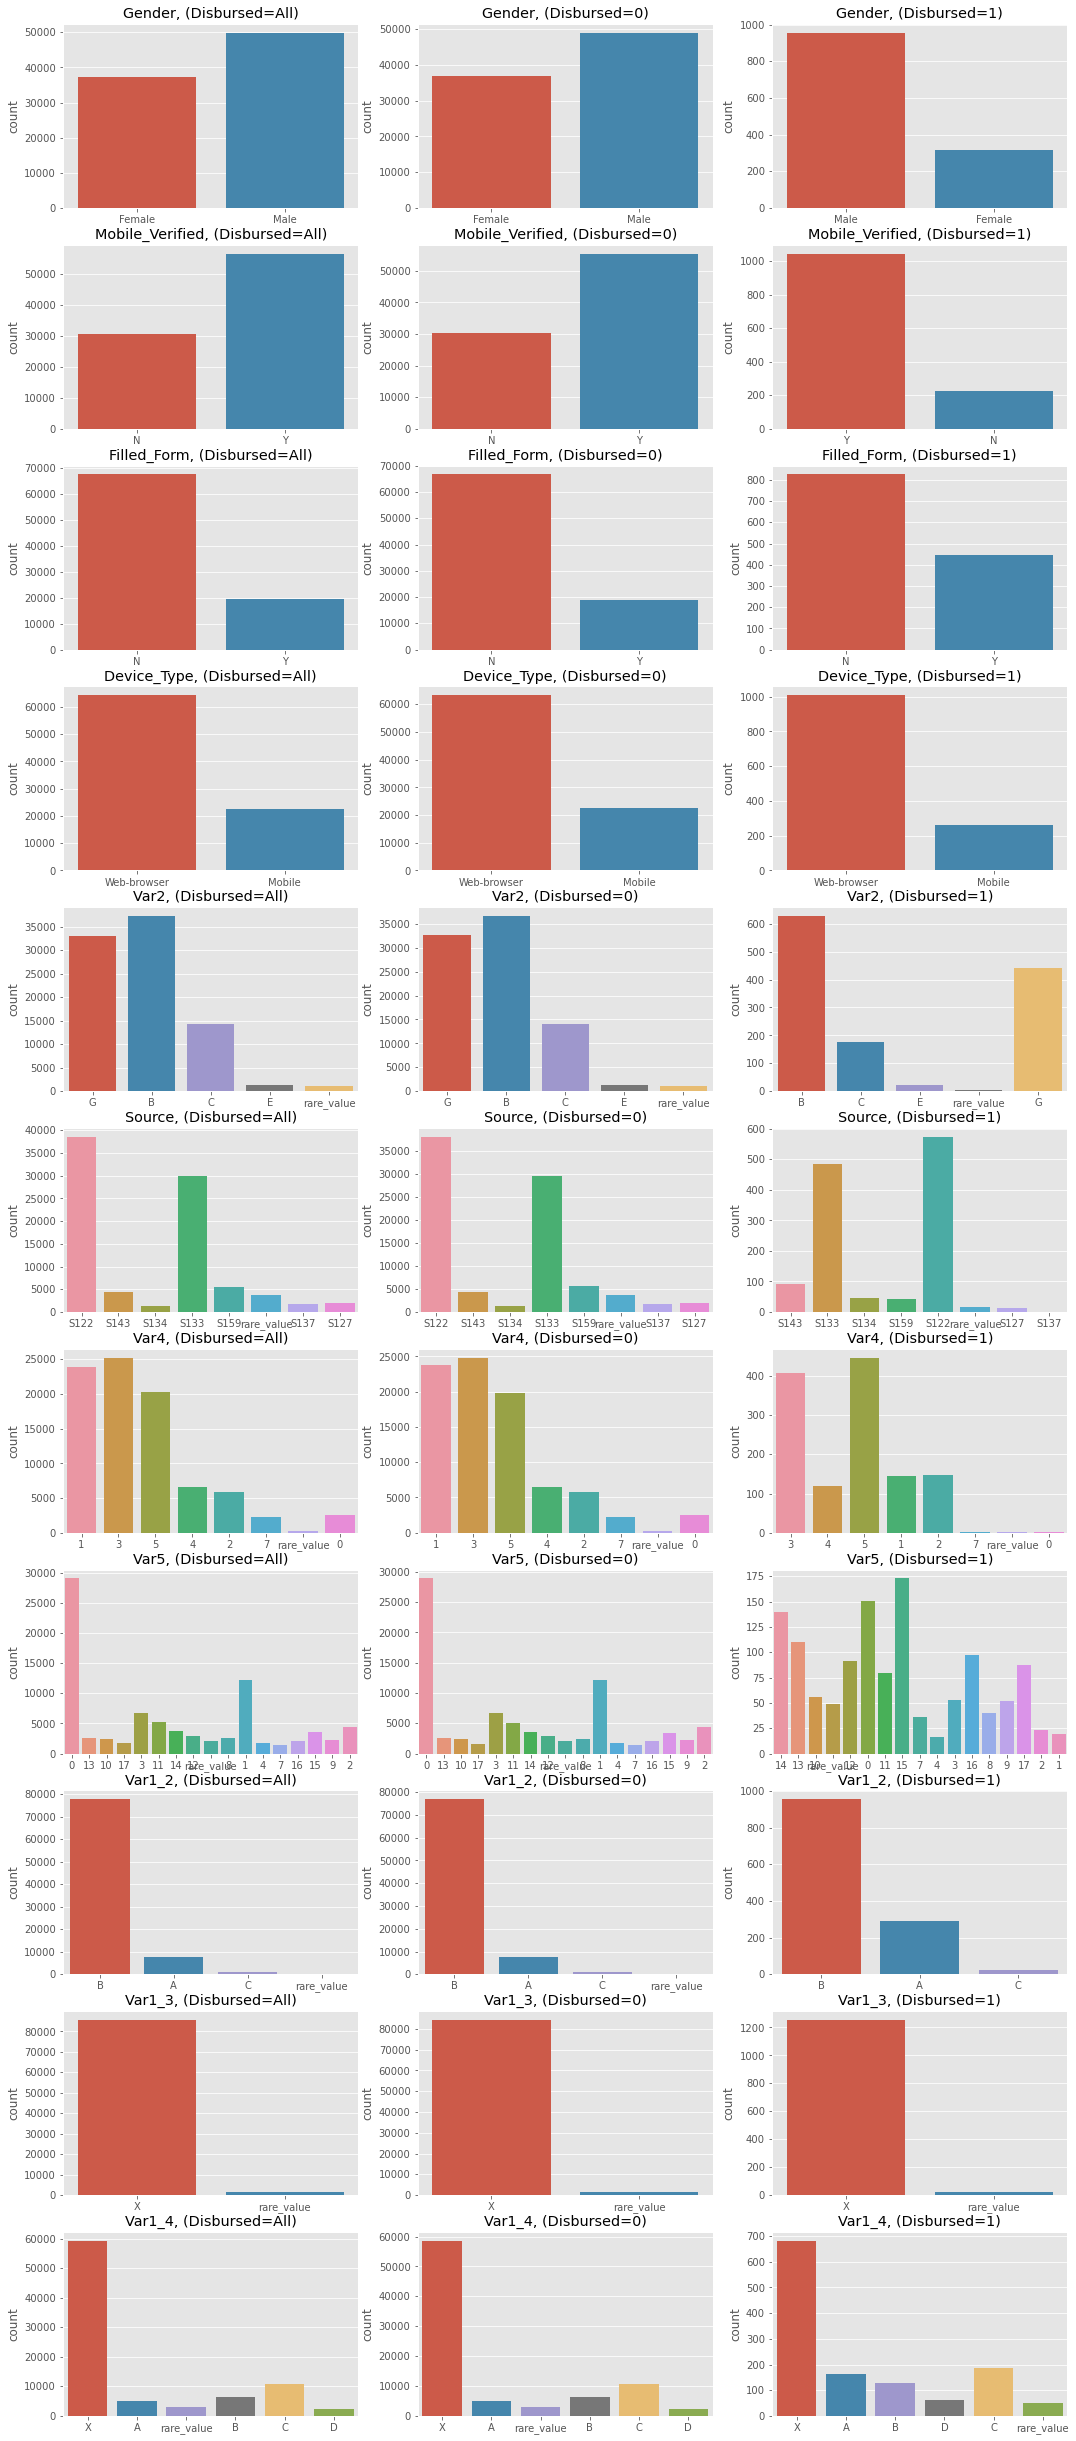

In [35]:
#histogramy

n=len(categorical)
fig,ax = plt.subplots(n,3, figsize=(18,n*4), sharex=False)

for i in range(n):
    plt.sca(ax[i,0])
    col = data[categorical].columns[i]
    sns.countplot(data[col].values)
    plt.title('{}, (Disbursed=All)'.format(data[categorical].columns[i]))
    
    plt.sca(ax[i,1])
    col = data[categorical].columns[i]
    sns.countplot(data[data["Disbursed"] == 0][col].values)
    plt.title('{}, (Disbursed=0)'.format(data[categorical].columns[i]))
    
    plt.sca(ax[i,2])
    col = data[categorical].columns[i]
    sns.countplot(data[data["Disbursed"] == 1][col].values)
    plt.title('{}, (Disbursed=1)'.format(data[categorical].columns[i]))

#### Zmienne: DOB (Date of birth) i lead_creation_date niosą ważną informację, jednak z punktu widzenia banku udzielającego pożyczki, badany jest wiek w dniu wysłania wniosku o pożyczkę. Dlatego z tych danych warto wyciągnąć tę dodatkową informację. Prawdopodobnie później nie będą już potrzebne.

In [36]:
data["DOB"].value_counts()

11-Nov-80    306
02-Jan-70    226
01-Jan-70    148
01-Jan-90    131
01-Jan-80    111
            ... 
19-Apr-68      1
05-Sep-73      1
24-Jan-60      1
24-Apr-58      1
21-Jul-59      1
Name: DOB, Length: 11345, dtype: int64

In [37]:
data["Lead_Creation_Date"].value_counts()

03-Jul-15    2315
23-Jul-15    1994
30-Jul-15    1297
27-Jul-15    1292
31-Jul-15    1268
             ... 
24-May-15     502
31-May-15     498
12-Jul-15     475
10-May-15     459
14-Jun-15     373
Name: Lead_Creation_Date, Length: 92, dtype: int64

In [38]:
data["Lead_datetime"] = pd.to_datetime(data["Lead_Creation_Date"])
data["DOB_datetime"] = pd.to_datetime(data["DOB"])
data["Lead_datetime"]

0       2015-05-15
1       2015-05-04
2       2015-05-19
3       2015-05-09
4       2015-05-20
           ...    
87015   2015-07-31
87016   2015-07-31
87017   2015-07-31
87018   2015-07-31
87019   2015-07-31
Name: Lead_datetime, Length: 87020, dtype: datetime64[ns]

#### powyżej występował ujemny wiek. Żeby to skorygować użyję prostej funkcji

In [39]:
def date_change(x):
    if x.year < 2000:
        year = x.year 
    else:
        year = x.year-100
    return datetime.date(year,x.month,x.day)

In [40]:
data['DOB_datetime'] = pd.to_datetime(data['DOB_datetime'].apply(date_change))

In [41]:
data["Age_when_leading"] = data['Lead_datetime']-data['DOB_datetime']
data["Age_when_leading"]

0       13506 days
1       10801 days
2       12274 days
3       10022 days
4       11415 days
           ...    
87015   16682 days
87016    9008 days
87017   15890 days
87018   13974 days
87019    9769 days
Name: Age_when_leading, Length: 87020, dtype: timedelta64[ns]

In [42]:
# wiek w dniach niewiele mówi, zamiana na lata
data["Age_when_leading"] = data["Age_when_leading"] / np.timedelta64(1,'Y')


In [43]:
data["Age_when_leading"]

0        36.978172
1        29.572134
2        33.605071
3        27.439304
4        31.253208
           ...    
87015    45.673765
87016    24.663066
87017    43.505342
87018    38.259513
87019    26.746614
Name: Age_when_leading, Length: 87020, dtype: float64

In [44]:
data[data["Disbursed"] == 1][data["Age_when_leading"] < 1]["Age_when_leading"].count()

0

<AxesSubplot:xlabel='Age_when_leading'>

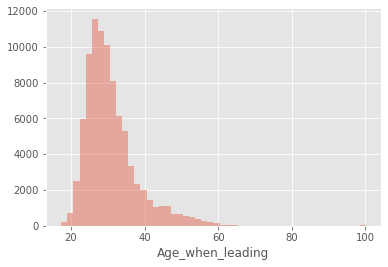

In [45]:
#histogram na Age_when_leading
sns.distplot(data["Age_when_leading"].dropna(), kde=False,bins=50)

#### nie ma wieku ujemnego

#### teoretycznie wiek z taką dokładnością po przecinku jest niepotrzebny, ale nie będę go zaokrąglać

In [46]:
numerical=['Monthly_Income',
          'Loan_Amount_Applied',
          'Existing_EMI',
          'Loan_Amount_Submitted',
          'Interest_Rate',
          'Processing_Fee',
          'EMI_Loan_Submitted',
          'Age_when_leading',
          'Loan_Tenure_Applied',
          'Loan_Tenure_Submitted',
         ]

In [47]:
#Opis zmiennych numerycznych
data.describe()

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Disbursed,Age_when_leading
count,8.702000e+04,8.694900e+04,86949.000000,8.694900e+04,5.240700e+04,52407.000000,27726.000000,27420.000000,27726.000000,87020.000000,87020.000000
mean,5.884997e+04,2.302507e+05,2.131399,3.696228e+03,3.950106e+05,3.891369,19.197474,5131.150839,10999.528377,0.014629,30.886875
std,2.177511e+06,3.542068e+05,2.014193,3.981021e+04,3.082481e+05,1.165359,5.834213,4725.837644,7512.323050,0.120062,7.153898
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,5.000000e+04,1.000000,11.990000,200.000000,1176.410000,0.000000,17.391185
25%,1.650000e+04,0.000000e+00,0.000000,0.000000e+00,2.000000e+05,3.000000,15.250000,2000.000000,6491.600000,0.000000,26.053923
50%,2.500000e+04,1.000000e+05,2.000000,0.000000e+00,3.000000e+05,4.000000,18.000000,4000.000000,9392.970000,0.000000,29.246323
75%,4.000000e+04,3.000000e+05,4.000000,3.500000e+03,5.000000e+05,5.000000,20.000000,6250.000000,12919.040000,0.000000,33.772083
max,4.445544e+08,1.000000e+07,10.000000,1.000000e+07,3.000000e+06,6.000000,37.000000,50000.000000,144748.280000,1.000000,100.075977


#### Dla zmiennych, których skośność > 1 - będziemy brać logarytm ze zmiennej

In [48]:
data[numerical].nunique()

Monthly_Income            5825
Loan_Amount_Applied        277
Existing_EMI              3753
Loan_Amount_Submitted      203
Interest_Rate               73
Processing_Fee             571
EMI_Loan_Submitted        4530
Age_when_leading         11949
Loan_Tenure_Applied         11
Loan_Tenure_Submitted        6
dtype: int64

In [49]:
#Zmienna Monthly_Income
data["Monthly_Income"].describe()

count    8.702000e+04
mean     5.884997e+04
std      2.177511e+06
min      0.000000e+00
25%      1.650000e+04
50%      2.500000e+04
75%      4.000000e+04
max      4.445544e+08
Name: Monthly_Income, dtype: float64

<AxesSubplot:xlabel='Monthly_Income'>

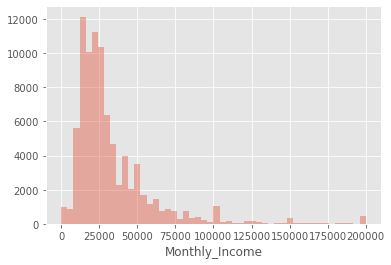

In [50]:
sns.distplot(data[data["Monthly_Income"]<=200000]["Monthly_Income"], kde=False)

<AxesSubplot:xlabel='Monthly_Income'>

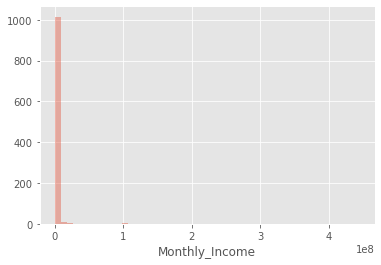

In [51]:
sns.distplot(data[data["Monthly_Income"]>200000]["Monthly_Income"], kde=False)

In [52]:
data["Monthly_Income_log"]=np.log(data["Monthly_Income"]+1) 
# mamy zerowe wartości - dodaję +1

<AxesSubplot:xlabel='Monthly_Income_log'>

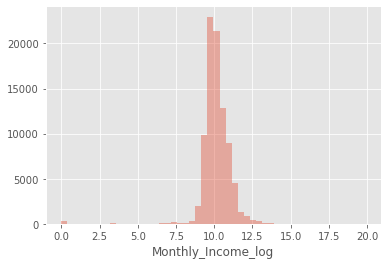

In [53]:
sns.distplot(data["Monthly_Income_log"], kde=False)

In [54]:
data["Monthly_Income_log"].describe()

count    87020.000000
mean        10.142147
std          0.995806
min          0.000000
25%          9.711176
50%         10.126671
75%         10.596660
max         19.912583
Name: Monthly_Income_log, dtype: float64

<AxesSubplot:xlabel='Loan_Amount_Applied'>

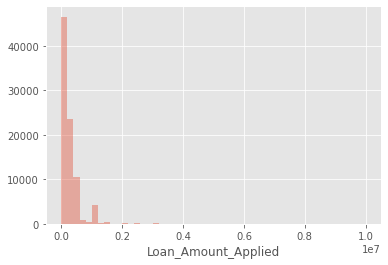

In [55]:
#Zmienna Loan_Amount_Applied
sns.distplot(data["Loan_Amount_Applied"].dropna(), kde=False,bins=50)

In [56]:
print(data.shape)
print(data[data["Loan_Amount_Applied"]==0].shape)

(87020, 31)
(28853, 31)


In [57]:
data["Loan_Amount_Applied_log"]=np.log(data["Loan_Amount_Applied"]+1) 
# mamy zerowe wartości - dodaję +1

In [58]:
print(data[data["Loan_Amount_Applied_log"].isnull()].shape)

(71, 32)


<AxesSubplot:xlabel='Loan_Amount_Applied_log'>

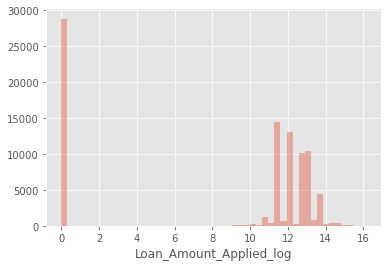

In [59]:
sns.distplot(data["Loan_Amount_Applied_log"].dropna(), kde=False,bins=50)

<AxesSubplot:xlabel='Existing_EMI'>

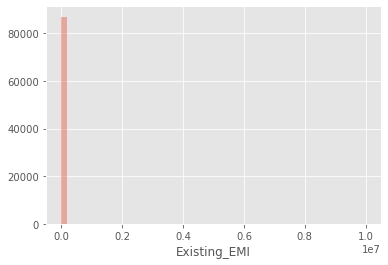

In [60]:
#Zm. Loan_Amount_Applied
sns.distplot(data["Existing_EMI"].dropna(), kde=False,bins=50)

In [61]:
data[data["Existing_EMI"]==0].shape

(58238, 32)

In [62]:
data["Existing_EMI_log"]=np.log(data["Existing_EMI"]+1)

<AxesSubplot:xlabel='Existing_EMI_log'>

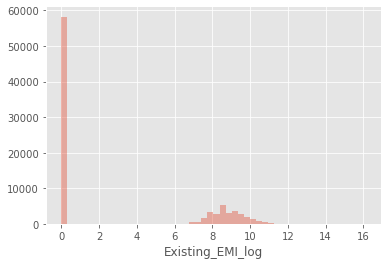

In [63]:
sns.distplot(data["Existing_EMI_log"].dropna(), kde=False,bins=50)

<AxesSubplot:xlabel='Loan_Amount_Submitted'>

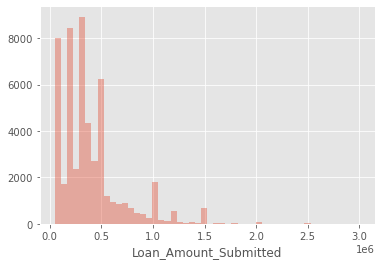

In [64]:
#Zm. Loan_Amount_Submitted
sns.distplot(data["Loan_Amount_Submitted"].dropna(), kde=False,bins=50)

In [65]:
data[data["Loan_Amount_Submitted"]==0].shape

(0, 33)

In [66]:
data["Loan_Amount_Submitted_log"]=np.log(data["Loan_Amount_Submitted"])

<AxesSubplot:xlabel='Loan_Amount_Submitted_log'>

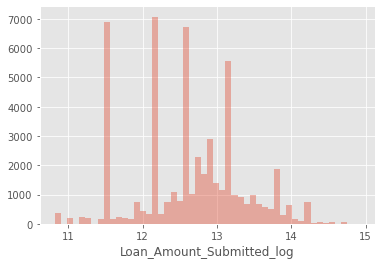

In [67]:
sns.distplot(data["Loan_Amount_Submitted_log"].dropna(), kde=False,bins=50)

<AxesSubplot:xlabel='Interest_Rate'>

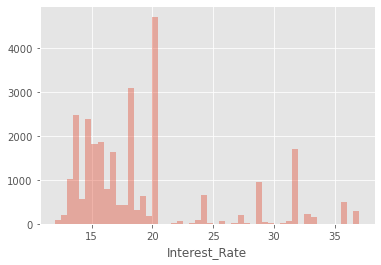

In [68]:
#Zm Interest_Rate
sns.distplot(data["Interest_Rate"].dropna(), kde=False,bins=50)

<AxesSubplot:xlabel='Processing_Fee'>

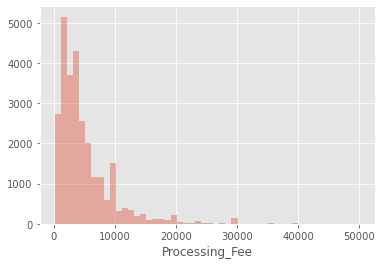

In [69]:
#Zm. Processing_Fee
sns.distplot(data["Processing_Fee"].dropna(), kde=False,bins=50)

In [70]:
data[data["Processing_Fee"]==0].shape

(0, 34)

In [71]:
data["Processing_Fee_log"]=np.log(data["Processing_Fee"])

<AxesSubplot:xlabel='Processing_Fee_log'>

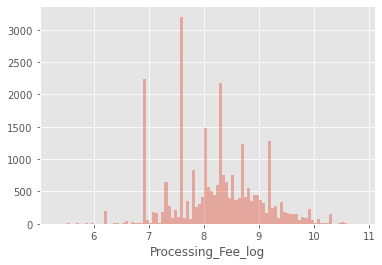

In [72]:
sns.distplot(data["Processing_Fee_log"].dropna(), kde=False,bins=100)

<AxesSubplot:xlabel='EMI_Loan_Submitted'>

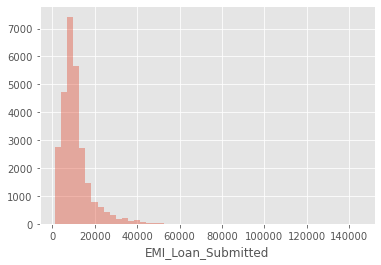

In [73]:
#Zm. EMI_Loan_Submitted
sns.distplot(data["EMI_Loan_Submitted"].dropna(), kde=False,bins=50)

In [74]:
data[data["EMI_Loan_Submitted"]==0].shape

(0, 35)

In [75]:
data["EMI_Loan_Submitted_log"]=np.log(data["EMI_Loan_Submitted"])

<AxesSubplot:xlabel='EMI_Loan_Submitted_log'>

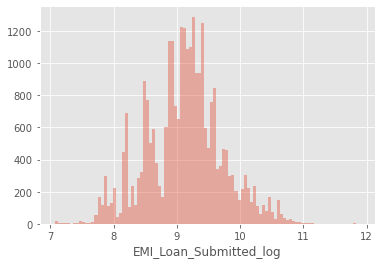

In [76]:
sns.distplot(data["EMI_Loan_Submitted_log"].dropna(), kde=False,bins=100)

<AxesSubplot:xlabel='Loan_Tenure_Applied'>

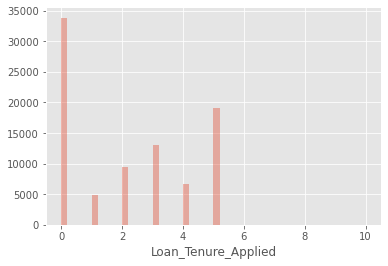

In [77]:
# Zm. Loan_Tenure_Applied
sns.distplot(data["Loan_Tenure_Applied"].dropna(), kde=False,bins=50)

#### zmienna ma pozornie charakter kategoryczny, jednak traktuję ją jako numeryczną (okres spłaty w latach)

In [78]:
numerical

['Monthly_Income',
 'Loan_Amount_Applied',
 'Existing_EMI',
 'Loan_Amount_Submitted',
 'Interest_Rate',
 'Processing_Fee',
 'EMI_Loan_Submitted',
 'Age_when_leading',
 'Loan_Tenure_Applied',
 'Loan_Tenure_Submitted']

In [79]:
numerical2=['Monthly_Income_log',
          'Loan_Amount_Applied_log',
          'Existing_EMI_log',
          'Loan_Amount_Submitted_log',
          'Interest_Rate',
          'Processing_Fee_log',
          'EMI_Loan_Submitted_log',
          'Age_when_leading',
          'Loan_Tenure_Applied',
          'Loan_Tenure_Submitted',
         ]

In [80]:
data[numerical2].describe()

,Monthly_Income_log,Loan_Amount_Applied_log,Existing_EMI_log,Loan_Amount_Submitted_log,Interest_Rate,Processing_Fee_log,EMI_Loan_Submitted_log,Age_when_leading,Loan_Tenure_Applied,Loan_Tenure_Submitted
count,87020.000000,86949.000000,86949.000000,52407.000000,27726.000000,27420.000000,27726.000000,87020.000000,86949.000000,52407.000000
mean,10.142147,8.265142,2.894271,12.630027,19.197474,8.221328,9.124703,30.886875,2.131399,3.891369
std,0.995806,5.874684,4.172718,0.723682,5.834213,0.801127,0.596747,7.153898,2.014193,1.165359
min,0.000000,0.000000,0.000000,10.819778,11.990000,5.298317,7.070223,17.391185,0.000000,1.000000
25%,9.711176,0.000000,0.000000,12.206073,15.250000,7.600902,8.778264,26.053923,0.000000,3.000000
50%,10.126671,11.512935,0.000000,12.611538,18.000000,8.294050,9.147717,29.246323,2.000000,4.000000
75%,10.596660,12.611541,8.160804,13.122363,20.000000,8.740337,9.466457,33.772083,4.000000,5.000000
max,19.912583,16.118096,16.118096,14.914123,37.000000,10.819778,11.882752,100.075977,10.000000,6.000000


In [81]:
#skośność
data[numerical2].skew(axis = 0, skipna = True)

Monthly_Income_log          -3.885030
Loan_Amount_Applied_log     -0.666104
Existing_EMI_log             0.787002
Loan_Amount_Submitted_log   -0.033532
Interest_Rate                1.430301
Processing_Fee_log           0.053518
EMI_Loan_Submitted_log       0.040313
Age_when_leading             1.606045
Loan_Tenure_Applied          0.264624
Loan_Tenure_Submitted       -0.843323
dtype: float64

In [82]:
#braki w danych
data[numerical2].isna().sum()

Monthly_Income_log               0
Loan_Amount_Applied_log         71
Existing_EMI_log                71
Loan_Amount_Submitted_log    34613
Interest_Rate                59294
Processing_Fee_log           59600
EMI_Loan_Submitted_log       59294
Age_when_leading                 0
Loan_Tenure_Applied             71
Loan_Tenure_Submitted        34613
dtype: int64

In [83]:
data.isna().sum()

Gender                           0
City                          1003
Monthly_Income                   0
DOB                              0
Lead_Creation_Date               0
Loan_Amount_Applied             71
Loan_Tenure_Applied             71
Existing_EMI                    71
Employer_Name                   71
Salary_Account               11764
Mobile_Verified                  0
Var5                             0
Var1                             0
Loan_Amount_Submitted        34613
Loan_Tenure_Submitted        34613
Interest_Rate                59294
Processing_Fee               59600
EMI_Loan_Submitted           59294
Filled_Form                      0
Device_Type                      0
Var2                             0
Source                           0
Var4                             0
Disbursed                        0
Var1_2                           0
Var1_3                           0
Var1_4                           0
Lead_datetime                    0
DOB_datetime        

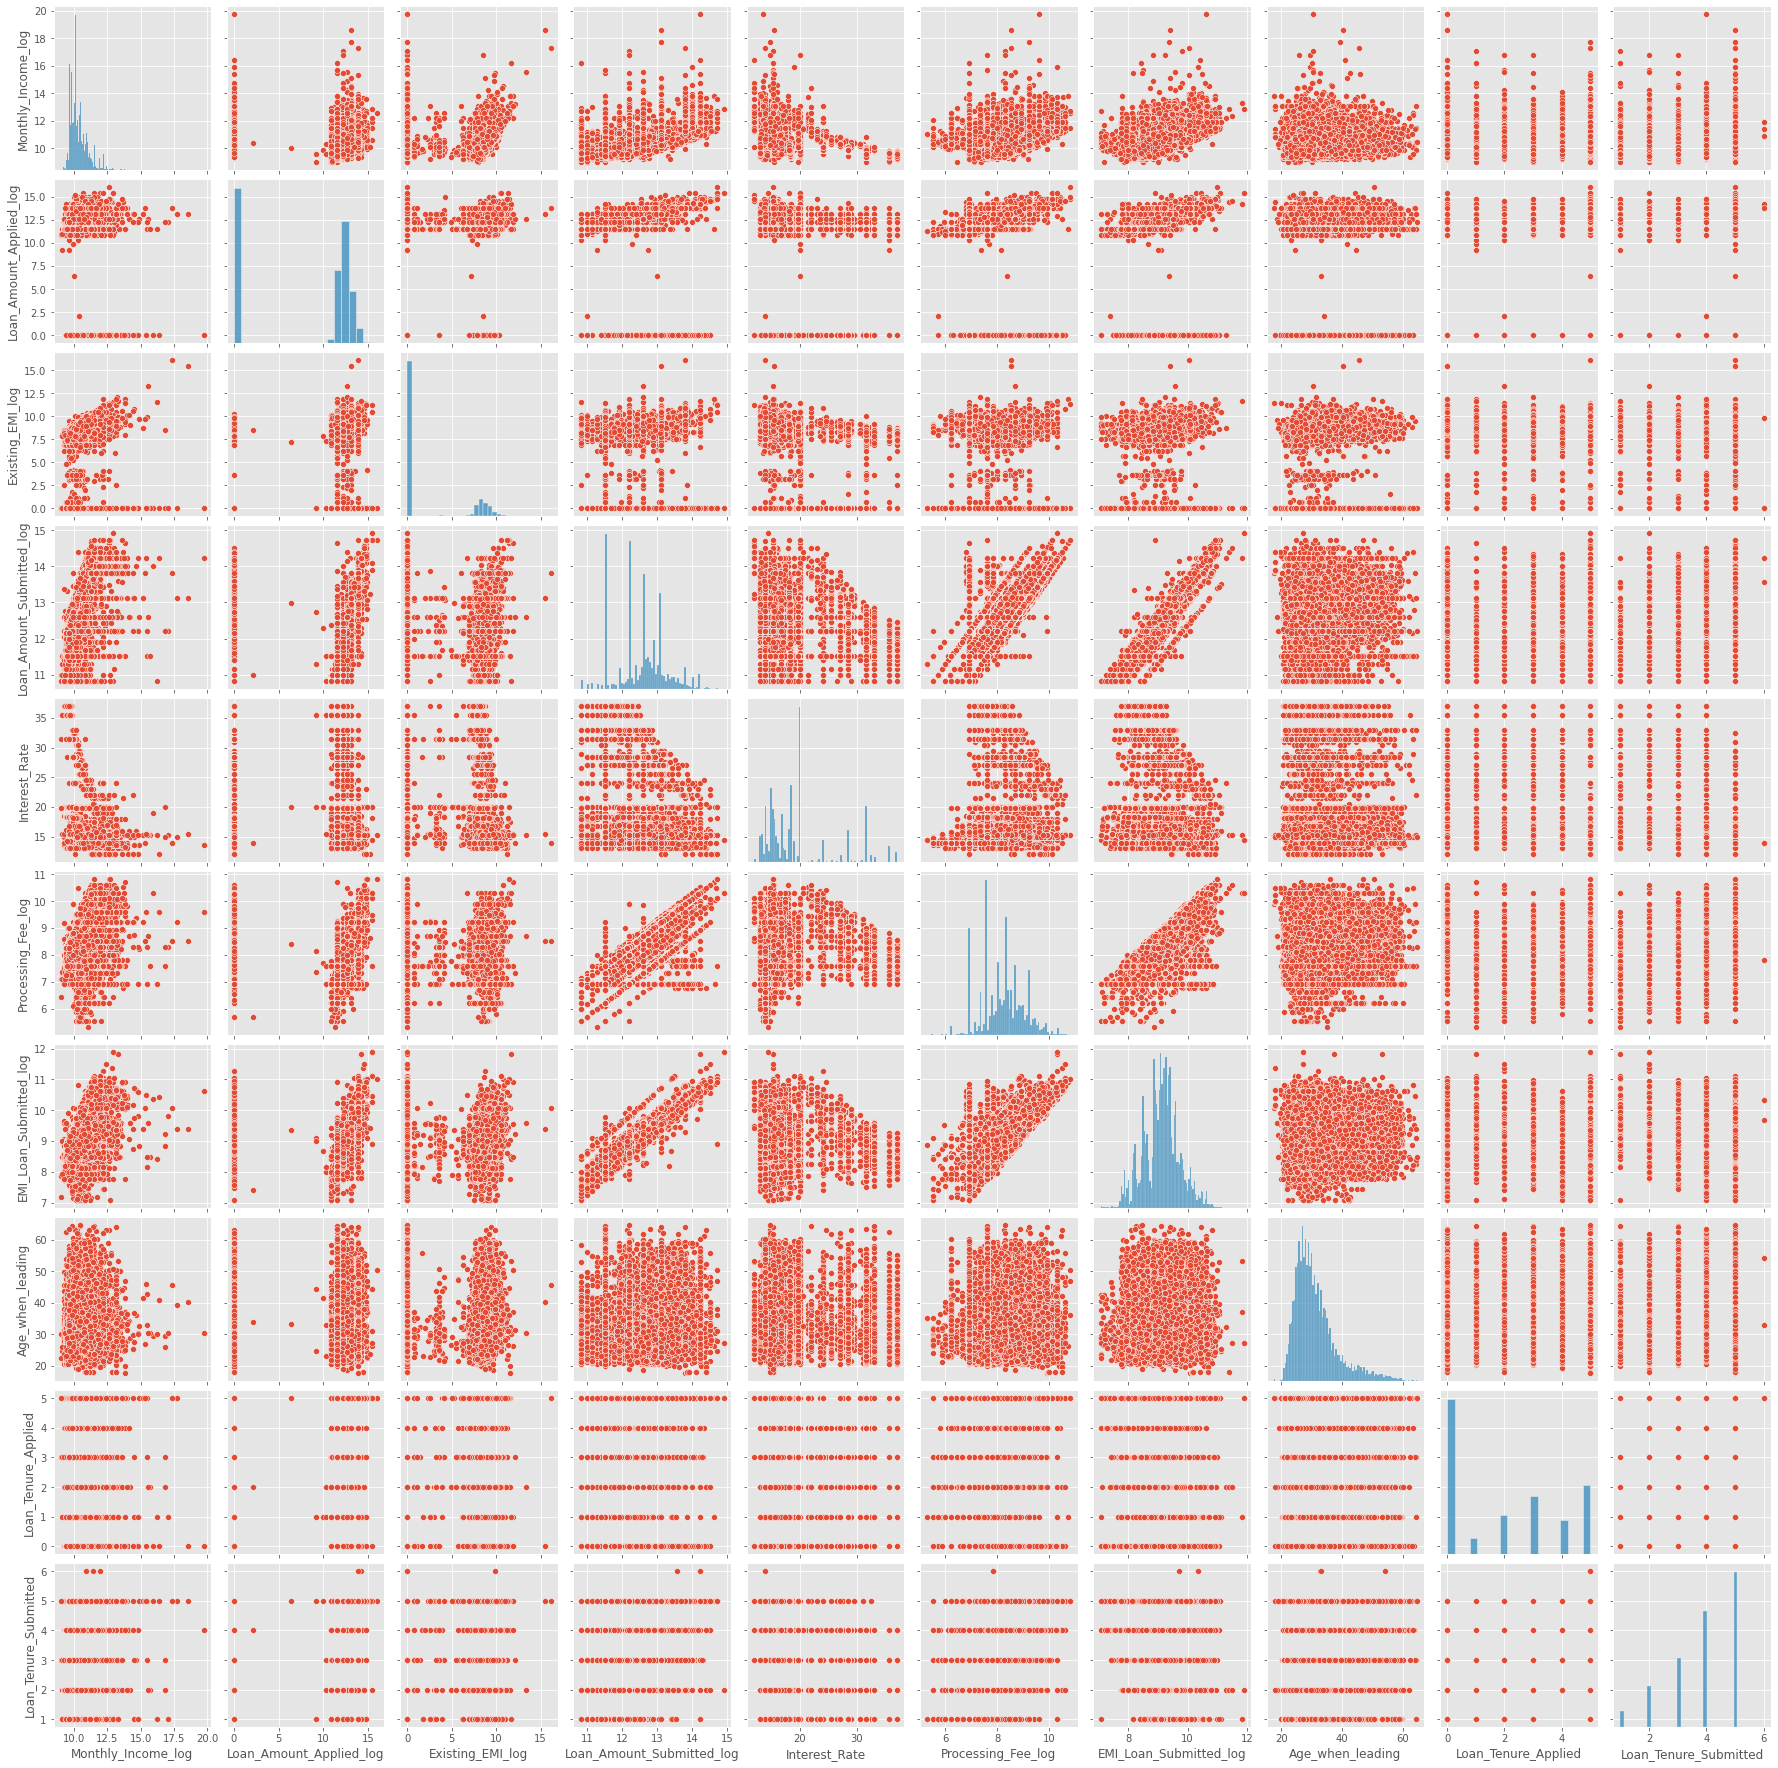

In [84]:
# pairplot - badanie zależności

sns.pairplot(data.dropna(subset=numerical2)[numerical2])
plt.show()

In [85]:
data.head()

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Var1_4,Lead_datetime,DOB_datetime,Age_when_leading,Monthly_Income_log,Loan_Amount_Applied_log,Existing_EMI_log,Loan_Amount_Submitted_log,Processing_Fee_log,EMI_Loan_Submitted_log
0,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,...,X,2015-05-15,1978-05-23,36.978172,9.903538,12.611541,0.000000,NaN,NaN,NaN
1,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,...,A,2015-05-04,1985-10-07,29.572134,10.463132,12.206078,0.000000,12.206073,NaN,8.819207
2,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,...,X,2015-05-19,1981-10-10,33.605071,10.021315,13.304687,0.000000,13.017003,NaN,NaN
3,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,...,X,2015-05-09,1987-11-30,27.439304,10.463132,13.815512,0.000000,13.732129,NaN,NaN
4,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,...,X,2015-05-20,1984-02-17,31.253208,11.512935,13.122365,10.126671,13.122363,NaN,NaN


In [86]:
# podział danych na X i y
X = data
# y = data['Disbursed'] 
# 'y' jest zdefiniowana wyżej

In [87]:
X.head()

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Var1_4,Lead_datetime,DOB_datetime,Age_when_leading,Monthly_Income_log,Loan_Amount_Applied_log,Existing_EMI_log,Loan_Amount_Submitted_log,Processing_Fee_log,EMI_Loan_Submitted_log
0,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,...,X,2015-05-15,1978-05-23,36.978172,9.903538,12.611541,0.000000,NaN,NaN,NaN
1,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,...,A,2015-05-04,1985-10-07,29.572134,10.463132,12.206078,0.000000,12.206073,NaN,8.819207
2,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,...,X,2015-05-19,1981-10-10,33.605071,10.021315,13.304687,0.000000,13.017003,NaN,NaN
3,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,...,X,2015-05-09,1987-11-30,27.439304,10.463132,13.815512,0.000000,13.732129,NaN,NaN
4,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,...,X,2015-05-20,1984-02-17,31.253208,11.512935,13.122365,10.126671,13.122363,NaN,NaN


In [88]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Disbursed, dtype: int64

In [89]:
numerical = numerical2

In [90]:
numerical

['Monthly_Income_log',
 'Loan_Amount_Applied_log',
 'Existing_EMI_log',
 'Loan_Amount_Submitted_log',
 'Interest_Rate',
 'Processing_Fee_log',
 'EMI_Loan_Submitted_log',
 'Age_when_leading',
 'Loan_Tenure_Applied',
 'Loan_Tenure_Submitted']

#### Pipeline z podziałem na dane numeryczne i kategoryczne

Transformator 'DataFrameSelector' - wybiera kolumny (jeżeli są w danych) po podaniu listy z nazwami

In [91]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        available_columns = set(X.columns).intersection(self.attribute_names)
        return X[available_columns]

In [92]:
pipeline_numerical = Pipeline([("select_numeric", DataFrameSelector(numerical)),
                               ("imputer", SimpleImputer(strategy="median")),
                              ])
pipeline_numerical.fit_transform(data[numerical]).shape

(87020, 10)

In [93]:
# OneHotEncoder (poniżej) wyrzucał błąd dot. typu danych
# zmiana typu na string
data[categorical]=data[categorical].astype('str',copy=False)

In [94]:
pipeline_categorical = Pipeline([("select_cat", DataFrameSelector(categorical)),
                                 ("cat_encoder", OneHotEncoder(handle_unknown='ignore', sparse=False)),
                                ])
pipeline_categorical.fit_transform(data).shape

(87020, 58)

In [95]:
preprocess_pipeline = FeatureUnion(transformer_list=[("pipeline_numerical", pipeline_numerical),
                                                     ("pipeline_categorical", pipeline_categorical),
                                                    ])

In [96]:
preprocess_pipeline.fit_transform(data).shape

(87020, 68)

In [97]:
seed = 5

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=seed)

#### mam do czynienia z niezbalansowanymi klasami, dlatego zastosuję undersampling, oversampling, SMOTE. Szukam najlepszych paramentrów przez GridSearch. Sprawdzę kilka klasyfikatorów 

In [99]:
pip install imblearn

You should consider upgrading via the 'c:\users\my\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [100]:
import imblearn as imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Pipeline_imbl

In [101]:
# wykorzystujemy RandomUnderSampler i RandomOverSampler zaimportowane z biblioteki imblearn
undersample = RandomUnderSampler(random_state=seed)
X_train_undersampling, y_train_undersampling = undersample.fit_resample(X_train, y_train)

oversample = RandomOverSampler(random_state=seed)
X_train_oversampling, y_train_oversampling = oversample.fit_resample(X_train, y_train)

In [104]:
pipeline_undersampling = Pipeline([('preprocessing', preprocess_pipeline),
                                   ('scaler', StandardScaler()),
                                   ('classifier', RandomForestClassifier())])
pipeline_undersampling.fit(X_train_undersampling, y_train_undersampling)

print(metrics.roc_auc_score (y_train_undersampling, pipeline_undersampling.predict_proba(X_train_undersampling)[:,1]))

1.0


In [105]:
# wybrane modele z undersamplingiem. 

kfold = StratifiedKFold(n_splits=10, random_state=seed)

models=[]

# US - UnderSampling
names = ["US_GaussianNB",
         "US_LogisticRegression",
         "US_RandomForestClassifier",
         "US_XGBClassifier"
        ]

pipelines = [Pipeline(steps=[('preprocessing', preprocess_pipeline),
                             ('scaler', StandardScaler()),
                             ('classifier', GaussianNB())]),
            Pipeline(steps=[('preprocessing', preprocess_pipeline),
                            ('scaler', StandardScaler()),
                            ('classifier', LogisticRegression())]),
            Pipeline(steps=[('preprocessing', preprocess_pipeline),
                            ('scaler', StandardScaler()),
                            ('classifier', RandomForestClassifier())]),
            Pipeline(steps=[('preprocessing', preprocess_pipeline),
                            ('scaler', StandardScaler()),
                            ('classifier', XGBClassifier())]),
            ]

param_grids = [ {},
                {'classifier__C': [0.1, 1, 10]},
                {'scaler': [None],
                 'classifier__n_estimators': [100, 200, 300],
                 'classifier__min_samples_leaf': [2, 5],},
                {'scaler': [StandardScaler()],
                 'classifier__n_estimators': [300],
                 'classifier__learning_rate': [0.1, 1, 10]},
              ]

In [106]:
for name, mod, grid in zip(names, pipelines, param_grids):
    gs = GridSearchCV(mod, grid, cv=kfold, return_train_score=True , refit=True)
    gs.fit(X_train_undersampling, y_train_undersampling)
    models.append((name, gs.best_estimator_))
    print(name)
    print(gs.best_params_)

US_GaussianNB
{}
US_LogisticRegression
{'classifier__C': 1}
US_RandomForestClassifier
{'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 100, 'scaler': None}
US_XGBClassifier
{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 300, 'scaler': StandardScaler()}


In [107]:
models_undersampling = models

In [109]:
#oceny na danych train
names=[]
precision = []
recall = []
f1 = []
accuracy = []
roc_auc = []
for name, model in models_undersampling:
    names.append(name)
    precision.append(metrics.precision_score(y_train_undersampling, model.predict(X_train_undersampling), average='weighted'))
    recall.append(metrics.recall_score(y_train_undersampling, model.predict(X_train_undersampling), average='weighted'))
    f1.append( metrics.f1_score(y_train_undersampling, model.predict(X_train_undersampling), average='weighted'))
    accuracy.append(metrics.accuracy_score(y_train_undersampling, model.predict(X_train_undersampling)))
    roc_auc.append(metrics.roc_auc_score(y_train_undersampling, model.predict_proba(X_train_undersampling)[:,1]))
    
d = {'roc_auc': roc_auc, 
     'precision': precision, 
     'recall': recall,
     'f1' : f1,
     'accuracy' : accuracy
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=names)
df

,Method,roc_auc,precision,recall,f1,accuracy
0,US_GaussianNB,0.790446,0.735068,0.626614,0.577931,0.626614
1,US_LogisticRegression,0.830464,0.756417,0.754717,0.754310,0.754717
2,US_RandomForestClassifier,0.987804,0.932382,0.931480,0.931444,0.931480
3,US_XGBClassifier,0.998874,0.984715,0.984608,0.984607,0.984608


In [110]:
# oversampling
pipeline_oversampling = Pipeline([
                    ('preprocessing', preprocess_pipeline),
                    ('scaler', StandardScaler()),
                    ('classifier', RandomForestClassifier())])

pipeline_oversampling.fit(X_train_oversampling, y_train_oversampling)

#ocena na danych train
print(metrics.roc_auc_score(y_train_oversampling, pipeline_oversampling.predict_proba(X_train_oversampling)[:,1]))

0.9999995740563009


In [111]:
# Sprawdzenie wybranych modeli z oversamplingiem
# przeszukiwanie parametrów w celu poprawy wyników

kfold = StratifiedKFold(n_splits=10, random_state=seed)

models=[]

# OS - OverSampling
names = ["OS_GaussianNB",
         "OS_LogisticRegression",
         "OS_RandomForestClassifier",
         "OS_XGBClassifier"
        ]

pipelines = [Pipeline(steps=[('preprocessing', preprocess_pipeline),
                            ('scaler', StandardScaler()),
                            ('classifier', GaussianNB())]),
            Pipeline(steps=[('preprocessing', preprocess_pipeline),
                            ('scaler', StandardScaler()),
                            ('classifier', LogisticRegression())]),
            Pipeline(steps=[('preprocessing', preprocess_pipeline),
                            ('scaler', StandardScaler()),
                            ('classifier', RandomForestClassifier())]),
            Pipeline(steps=[('preprocessing', preprocess_pipeline),
                            ('scaler', StandardScaler()),
                            ('classifier', XGBClassifier())])
            ]

param_grids = [{},
               {'classifier__C': [0.1, 1, 10]},
               {'scaler': [None],
                'classifier__n_estimators': [100, 200, 300],
                'classifier__min_samples_leaf': [2, 5] },
               {'scaler': [StandardScaler()],
                'classifier__n_estimators': [300],
                'classifier__learning_rate': [0.1, 1, 10]},
              ]


In [112]:
for name, mod, grid in zip(names, pipelines, param_grids):
    gs = GridSearchCV(mod, grid, cv=kfold, return_train_score=True , refit=True)
    gs.fit(X_train_oversampling, y_train_oversampling)
    models.append((name, gs.best_estimator_))
    print(name)
    print(gs.best_params_)

OS_GaussianNB
{}
OS_LogisticRegression
{'classifier__C': 0.1}
OS_RandomForestClassifier
{'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 300, 'scaler': None}
OS_XGBClassifier
{'classifier__learning_rate': 1, 'classifier__n_estimators': 300, 'scaler': StandardScaler()}


In [113]:
models_oversampling = models

In [114]:
#oceny na danych train
names=[]
precision = []
recall = []
f1 = []
accuracy = []
roc_auc = []
for name, model in models_oversampling:
    names.append(name)
    precision.append(metrics.precision_score(y_train_oversampling, model.predict(X_train_oversampling), average='weighted'))
    recall.append(metrics.recall_score(y_train_oversampling, model.predict(X_train_oversampling), average='weighted'))
    f1.append( metrics.f1_score(y_train_oversampling, model.predict(X_train_oversampling), average='weighted'))
    accuracy.append(metrics.accuracy_score(y_train_oversampling, model.predict(X_train_oversampling)))
    roc_auc.append(metrics.roc_auc_score(y_train_oversampling, model.predict_proba(X_train_oversampling)[:,1]))
    
d = {'roc_auc': roc_auc, 
     'precision': precision, 
     'recall': recall,
     'f1' : f1,
     'accuracy' : accuracy
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=names)
df

,Method,roc_auc,precision,recall,f1,accuracy
0,OS_GaussianNB,0.785372,0.741445,0.628139,0.578714,0.628139
1,OS_LogisticRegression,0.830765,0.757574,0.756264,0.755953,0.756264
2,OS_RandomForestClassifier,0.999975,0.998967,0.998965,0.998965,0.998965
3,OS_XGBClassifier,1.000000,0.999942,0.999942,0.999942,0.999942


In [116]:
models = []
models= models_undersampling + models_oversampling

names=[]
precision = []
recall = []
f1 = []
accuracy = []
roc_auc = []
for name, model in models:
    names.append(name)
    precision.append(metrics.precision_score(y_test, model.predict(X_test), average='weighted'))
    recall.append(metrics.recall_score(y_test, model.predict(X_test), average='weighted'))
    f1.append(metrics.f1_score(y_test, model.predict(X_test), average='weighted'))
    accuracy.append(metrics.accuracy_score(y_test, model.predict(X_test)))
    roc_auc.append(metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    
d = {'roc_auc': roc_auc, 
     'precision': precision, 
     'recall': recall,
     'f1' : f1,
     'accuracy' : accuracy,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=names)
df


,Method,roc_auc,precision,recall,f1,accuracy
0,US_GaussianNB,0.778277,0.981702,0.302861,0.446582,0.302861
1,US_LogisticRegression,0.817681,0.981065,0.720352,0.823573,0.720352
2,US_RandomForestClassifier,0.841308,0.981969,0.697254,0.807553,0.697254
3,US_XGBClassifier,0.823263,0.981009,0.703459,0.811961,0.703459
4,OS_GaussianNB,0.781785,0.982667,0.301310,0.444491,0.301310
5,OS_LogisticRegression,0.821952,0.980756,0.722305,0.824923,0.722305
6,OS_RandomForestClassifier,0.839587,0.970737,0.979028,0.974764,0.979028
7,OS_XGBClassifier,0.745063,0.970864,0.976212,0.973494,0.976212


#### W celu oceny prawdopodobieństwa udzielenia pożyczki, z powyższych klasyfikatorów najlepiej wybrać model RandomForestClassifier z undersamplngiem. Przy tym klasyfikatorze jest najwyższe ROC AUC, przez co wiadomo, że najtrafniej dobiera grupę klientów, która otrzymała pożyczkę

#### Oczywiście można spróbować z innymi klasyfikatorami, można także zamiast under- czy oversamplingu spróbować SMOTE. 